<a href="https://colab.research.google.com/github/RodrigoAB93/Trabalho_AM_Nao_Supervisionado/blob/main/Trabalho_Aprendizado_de_maquina_n%C3%A3o_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#---------------------------------------------------------------------------------------------# 
### Trabalho desenvolvido para disciplina Aprendizado de Maquina não supervisionada. 
### Desenvolvido por: 
### Rodrigo Almeida Bezerra 
### rodrigobezerra@ufba.br  
### Professor:  Ricardo Araujo Rios  
### Fonte: https://www.kaggle.com/datasets/derrickmwiti/google-2019-cluster-sample 
#---------------------------------------------------------------------------------------------# 

In [35]:
#Importing necessary libraries. 

# DataFrame 
import pandas as pd 

# Matplot
import matplotlib.pyplot as plt
import matplotlib as mpl

# Scikit-learn
from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score, jaccard_score
from sklearn.preprocessing import StandardScaler 

# Helper Libraries 
import numpy as np 
import seaborn as sns   
import plotly.express as px   
import scipy.cluster.hierarchy as shc 

In [4]:
# Importando e lendo o dataset do google drive
data = pd.read_csv('/content/drive/MyDrive/Mestrado/TrabalhoInteligenciaComputacional/GoogleCluster2019.csv',sep=',') 
data

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
0,0,0,2,94591244395,3,1,200,0,144,168846390496,...,0.014435,0.000415,NaN,NaN,1.000000,[0.00314331 0.00381088 0.00401306 0.00415039 0...,[0.00535583 0.00541687 0.00548553 0.00554657 0...,7,FAIL,1
1,1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,...,0.000000,0.000000,NaN,NaN,1.000000,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,7,FAIL,1
2,2,195684022913,6,276227177776,2,0,103,0,376,169321752432,...,0.010422,0.000235,0.939919,0.001318,1.000000,[0.01344299 0.01809692 0.0201416 0.02246094 0...,[0.02902222 0.02929688 0.0295105 0.0296936 0...,7,SCHEDULE,0
3,3,0,2,10507389885,3,0,200,0,1977,178294817221,...,0.041626,0.000225,1.359102,0.007643,1.000000,[0.03704834 0.04125977 0.04290771 0.04425049 0...,[0.05535889 0.05584717 0.05633545 0.05718994 0...,8,FAIL,1
4,4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,...,0.000272,0.000010,NaN,NaN,1.000000,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405889,405889,0,2,299950285958,1,0,117,0,1341,10625460233,...,0.002117,0.000048,0.693324,0.003158,1.000000,[0.00022793 0.00822449 0.00866699 0.01246643 0...,[0.0222168 0.02261353 0.02294922 0.02404785 0...,8,FAIL,1
405890,405890,18279167039,0,330587213089,2,0,360,330587120885,898,68669881389,...,0.000000,0.002468,1.019433,0.001859,1.000000,[0.01028442 0.02087402 0.02432251 0.02661133 0...,[0.05828857 0.05871582 0.05938721 0.06097412 0...,1,ENABLE,0
405891,405891,733307641549,3,13748637767,3,0,200,13748635759,1959,126641993288,...,0.000000,0.000480,0.990970,0.002941,1.000000,[0.00857544 0.01472473 0.01660156 0.01873779 0...,[0.03515625 0.03552246 0.03729248 0.03912354 0...,2,FINISH,0
405892,405892,1984523129238,2,323372663325,1,0,117,0,6452,191941429308,...,0.001562,0.000229,3.023431,0.015743,0.996667,[0.00024414 0.00030136 0.00036907 0.00073719 0...,[0.00904846 0.00907898 0.00909424 0.00912476 0...,8,FAIL,1


In [5]:
#Substitui onde tiver NaN por 0
data = data.fillna(0)

In [6]:
#Trabalhando somente com uma amostra
data = data.sample(1000) 
data

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
78497,78497,612543311921,3,277046179944,2,0,360,221495383870,1754,2325183911,...,0.000000,0.002304,0.954782,0.006493,1.000000,[0.00016499 0.00107956 0.00330353 0.01011658 0...,[0.04119873 0.04162598 0.04199219 0.04266357 0...,7,FINISH,0
332447,332447,1845075758698,5,763369045219,0,0,103,0,2023,2154663892,...,0.002407,0.000564,0.000000,0.000000,1.000000,[9.53674316e-07 5.92231750e-04 8.27789307e-04 ...,[0.01428223 0.01441956 0.01454163 0.01467896 0...,3,LOST,0
309293,309293,2323604343468,6,322847600665,3,1,200,0,271,1183496379,...,0.013412,0.000531,0.000000,0.000000,0.996667,[0.00534821 0.0120697 0.014328 0.01611328 0...,[0.03060913 0.03094482 0.03179932 0.03240967 0...,8,SCHEDULE,0
323195,323195,1458534215395,6,755686677250,0,0,105,0,8573,1684863615,...,0.003250,0.000258,3.973979,0.016435,1.000000,[0.00013924 0.00014782 0.0001564 0.00016499 0...,[0.00025272 0.0002594 0.00026989 0.0002861 0...,3,SCHEDULE,0
184970,184970,2188104826791,5,775082942380,1,0,103,0,18180,560119197868,...,0.005989,0.000150,0.000000,0.000000,1.000000,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[9.53674316e-07 9.53674316e-07 9.53674316e-07 ...,3,LOST,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136910,136910,1913451219097,5,330587204926,2,0,360,330587135936,914,80261435188,...,0.000000,0.002110,0.830359,0.001282,1.000000,[0.00041485 0.02163696 0.02450562 0.02798462 0...,[0.04284668 0.04309082 0.043396 0.04370117 0...,1,LOST,0
250836,250836,705131437691,3,795359022771,0,0,0,0,361,121771942694,...,0.001823,0.000500,0.000000,0.000000,1.000000,[0.00017834 0.0001936 0.00021076 0.00022697 0...,[0.00052929 0.00054455 0.00055885 0.00057411 0...,4,FINISH,0
194593,194593,794337211618,3,222220476776,0,0,0,0,4058,155467392445,...,0.002605,0.000516,0.000000,0.000000,1.000000,[0.00012779 0.00013924 0.00014782 0.0001564 0...,[0.00028038 0.00029087 0.00030041 0.00030994 0...,5,FINISH,0
174687,174687,83967911179,1,330587172974,2,1,101,0,1801,290001667180,...,0.032654,0.002155,0.000000,0.000000,1.000000,[0.00022125 0.00067806 0.00880432 0.01254272 0...,[0.04968262 0.05053711 0.05126953 0.05206299 0...,1,EVICT,0


In [7]:
#Primeiros 10 exemplos do dataset de amostra
data.head(10) 

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
78497,78497,612543311921,3,277046179944,2,0,360,221495383870,1754,2325183911,...,0.000000,0.002304,0.954782,0.006493,1.000000,[0.00016499 0.00107956 0.00330353 0.01011658 0...,[0.04119873 0.04162598 0.04199219 0.04266357 0...,7,FINISH,0
332447,332447,1845075758698,5,763369045219,0,0,103,0,2023,2154663892,...,0.002407,0.000564,0.000000,0.000000,1.000000,[9.53674316e-07 5.92231750e-04 8.27789307e-04 ...,[0.01428223 0.01441956 0.01454163 0.01467896 0...,3,LOST,0
309293,309293,2323604343468,6,322847600665,3,1,200,0,271,1183496379,...,0.013412,0.000531,0.000000,0.000000,0.996667,[0.00534821 0.0120697 0.014328 0.01611328 0...,[0.03060913 0.03094482 0.03179932 0.03240967 0...,8,SCHEDULE,0
323195,323195,1458534215395,6,755686677250,0,0,105,0,8573,1684863615,...,0.003250,0.000258,3.973979,0.016435,1.000000,[0.00013924 0.00014782 0.0001564 0.00016499 0...,[0.00025272 0.0002594 0.00026989 0.0002861 0...,3,SCHEDULE,0
184970,184970,2188104826791,5,775082942380,1,0,103,0,18180,560119197868,...,0.005989,0.000150,0.000000,0.000000,1.000000,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[9.53674316e-07 9.53674316e-07 9.53674316e-07 ...,3,LOST,0
135853,135853,262202466483,3,128073966478,2,0,0,0,2202,1684927821,...,0.000228,0.000000,0.000000,0.000000,1.000000,[0.00073814 0.00110626 0.00127411 0.00144958 0...,[0.00234222 0.00236511 0.00239182 0.00241852 0...,3,FINISH,0
122091,122091,2102410634960,2,294544747384,1,0,103,0,883,173723043046,...,0.005211,0.000290,2.626804,0.012598,1.000000,[0.00031662 0.00034904 0.00035858 0.00036526 0...,[0.00044537 0.00045967 0.00047493 0.00055027 0...,8,FAIL,1
400148,400148,1894334434957,5,497097336736,0,0,103,0,5059,91312373,...,0.007362,0.000889,0.000000,0.000000,1.000000,[1.52587891e-05 4.00543213e-04 4.45365906e-04 ...,[0.01257324 0.01333618 0.01387024 0.01438904 0...,2,LOST,0
249019,249019,1832521630140,0,294544747384,1,0,103,0,1076,300551911146,...,0.005211,0.000311,2.847311,0.019281,1.000000,[0.00064087 0.00072861 0.00076103 0.00078964 0...,[0.00111198 0.00117683 0.00122452 0.00138092 0...,8,ENABLE,0
49053,49053,1922839843287,0,294544747384,1,0,103,0,274,273480551448,...,0.005211,0.000311,2.847311,0.019281,1.000000,[0.00064087 0.00072861 0.00076103 0.00078964 0...,[0.00111198 0.00117683 0.00122452 0.00138092 0...,8,ENABLE,0


In [8]:
#Eliminando colunas desnecessarias 
data = data.drop(columns=['Unnamed: 0','time', 'instance_events_type', 'resource_request', 'average_usage','cpu_usage_distribution', 'tail_cpu_usage_distribution','collection_id','scheduling_class', 'collection_type', 'priority','alloc_collection_id', 'instance_index', 'constraint', 'collections_events_type', 'user',
       'collection_name', 'collection_logical_name','start_after_collection_ids', 'vertical_scaling', 'scheduler','start_time', 'end_time', 'maximum_usage','random_sample_usage', 'assigned_memory', 'page_cache_memory', 'memory_accesses_per_instruction', 'failed'])

In [9]:
# Colunas que restaram no dataset
data.columns 

Index(['machine_id', 'cycles_per_instruction', 'sample_rate', 'cluster',
       'event'],
      dtype='object')

In [11]:
#Dataset
data

,machine_id,cycles_per_instruction,sample_rate,cluster,event
78497,2325183911,0.954782,1.000000,7,FINISH
332447,2154663892,0.000000,1.000000,3,LOST
309293,1183496379,0.000000,0.996667,8,SCHEDULE
323195,1684863615,3.973979,1.000000,3,SCHEDULE
184970,560119197868,0.000000,1.000000,3,LOST
...,...,...,...,...,...
136910,80261435188,0.830359,1.000000,1,LOST
250836,121771942694,0.000000,1.000000,4,FINISH
194593,155467392445,0.000000,1.000000,5,FINISH
174687,290001667180,0.000000,1.000000,1,EVICT


In [14]:
#Describe do dataset 
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
machine_id,1000.0,8.605131e+10,1.363098e+11,11.00,2.782584e+09,2.031449e+10,1.363832e+11,7.696570e+11
cycles_per_instruction,1000.0,1.495913e+00,1.445667e+00,0.00,0.000000e+00,1.075834e+00,2.601017e+00,7.539603e+00
sample_rate,1000.0,9.986213e-01,1.324937e-02,0.75,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
cluster,1000.0,4.634000e+00,2.209282e+00,1.00,3.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00


In [15]:
#Transformando dados qualitatitivos em numeros 

#LOST = 0 
#FAIL = 1 
#FINISH = 2  
#SCHEDULE = 3 
#ENABLE = 4  
#EVICT = 5 
#KILL = 6 
#UPDATE_PENDING = 7

data = data.replace('LOST',0).replace('FAIL',1).replace('FINISH',2).replace('SCHEDULE',3).replace('ENABLE',4).replace('EVICT',5).replace('KILL',6).replace('UPDATE_PENDING',7)  
data

,machine_id,cycles_per_instruction,sample_rate,cluster,event
78497,2325183911,0.954782,1.000000,7,2
332447,2154663892,0.000000,1.000000,3,0
309293,1183496379,0.000000,0.996667,8,3
323195,1684863615,3.973979,1.000000,3,3
184970,560119197868,0.000000,1.000000,3,0
...,...,...,...,...,...
136910,80261435188,0.830359,1.000000,1,0
250836,121771942694,0.000000,1.000000,4,2
194593,155467392445,0.000000,1.000000,5,2
174687,290001667180,0.000000,1.000000,1,5


In [16]:
#Quantidade de linhas e colunas no dataset
print(data.shape) 


(1000, 5)


Gráfico Histograma

In [17]:
#Quantidade de clusters por maquinas 

fig = px.histogram(data, x="machine_id",y="cluster")
fig.show()

Grafico de Disperção multivariado

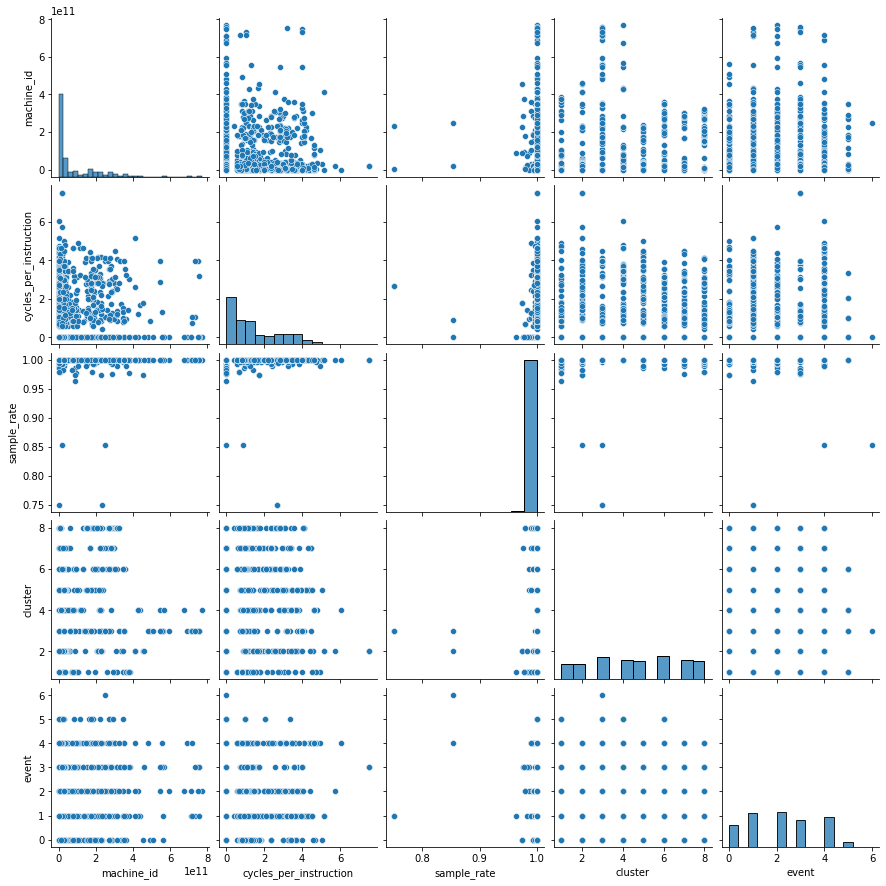

In [18]:
#Graficos entre as colunas
sns.pairplot(data)  

Gráficos Box plot


In [19]:
#Demonstrando numero de cluster por evento 
#Relembrando os eventos: 
#LOST = 0 #FAIL = 1 #FINISH = 2 #SCHEDULE = 3 #ENABLE = 4  #EVICT = 5 #KILL = 6 #UPDATE_PENDING = 7 
fig = px.box(data, x="event",y="cluster")
fig.show() 

GRÁFICO HISTOGRAMA EMPILHADO

<Figure size 432x288 with 0 Axes>

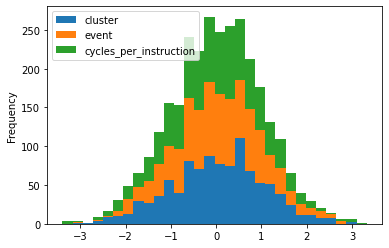

In [44]:
# HISTOGRAMA EMPILHADO 
# Comparando o numero de event, cycles_per_instruction e cluster
data_hist = pd.DataFrame(
      {
         "cluster": np.random.randn(1000) ,
         "event": np.random.randn(1000),
         "cycles_per_instruction": np.random.randn(1000),
       },
  columns=["cluster", "event","cycles_per_instruction"],
   ).astype(float);
plt.figure();
data_hist.plot.hist(stacked=True, bins=30);

Gráfico Boxplot

In [ ]:
#Maquinas x Cluster
scatterplot1 = px.scatter(data, x="machine_id",y="cluster")
scatterplot1.show()


Matriz de Correlação


In [24]:
#Indice de correlação entre as colunas do dataset
corr = data.iloc[:,0:].corr()
corr

,machine_id,cycles_per_instruction,sample_rate,cluster,event
machine_id,1.000000,-0.057067,-0.026794,-0.060192,-0.018576
cycles_per_instruction,-0.057067,1.000000,-0.003670,0.049912,0.030198
sample_rate,-0.026794,-0.003670,1.000000,0.060914,-0.003038
cluster,-0.060192,0.049912,0.060914,1.000000,0.091304
event,-0.018576,0.030198,-0.003038,0.091304,1.000000


Kmeans


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=1000)# random_state= semente aleatoria
clustering = kmeans.fit_predict(data) 
clustering

array([2, 2, 2, 4, 2, 4, 1, 4, 3, 2, 4, 4, 4, 4, 0, 4, 2, 4, 4, 1, 4, 4,
       4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 0, 4, 2, 0, 4, 4, 4, 4, 4, 4,
       0, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 0,
       4, 1, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 0, 0, 2, 4, 4, 4, 3,
       4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 0, 1, 3, 4, 2, 0, 4,
       2, 4, 4, 4, 0, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 0, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 4, 4, 4, 1, 2, 4, 0, 4, 1, 0, 4, 4, 4, 4, 0, 4, 0, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 1, 4, 2, 0, 4, 4, 4, 4, 4,
       1, 4, 1, 2, 2, 4, 4, 4, 2, 1, 2, 4, 4, 4, 3, 4, 4, 4, 1, 0, 0, 4,
       4, 1, 4, 4, 3, 4, 2, 1, 4, 1, 4, 1, 4, 0, 4, 4, 2, 4, 2, 2, 4, 4,
       0, 4, 4, 2, 2, 0, 1, 0, 4, 4, 1, 4, 4, 0, 1, 4, 1, 4, 4, 4, 0, 2,
       4, 4, 1, 0, 4, 2, 4, 2, 4, 0, 4, 0, 4, 4, 2, 4, 1, 2, 0, 0, 2, 4,
       2, 2, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 2, 1, 4, 1, 4, 4, 4, 2, 4,
       4, 4, 4, 4, 4, 4, 2, 0, 4, 2, 4, 4, 4, 4, 2,

In [ ]:
silhouette = silhouette_score(data, clustering)
print("Silhouette:", silhouette)

Silhouette: 0.7587858307293804


In [ ]:
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage = 'average')
clustering = clustering.fit_predict(data)

In [ ]:
silhouette_avg = silhouette_score(data, clustering)
print("Silhouette :", silhouette)

Silhouette : 0.7587858307293804


DBSCAN

In [26]:
df = data[['machine_id', 'cycles_per_instruction','cluster','event']]  
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
machine_id,1000.0,8.605131e+10,1.363098e+11,11.0,2.782584e+09,2.031449e+10,1.363832e+11,7.696570e+11
cycles_per_instruction,1000.0,1.495913e+00,1.445667e+00,0.0,0.000000e+00,1.075834e+00,2.601017e+00,7.539603e+00
cluster,1000.0,4.634000e+00,2.209282e+00,1.0,3.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00
event,1000.0,2.169000e+00,1.428454e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00


In [27]:
df

,machine_id,cycles_per_instruction,cluster,event
78497,2325183911,0.954782,7,2
332447,2154663892,0.000000,3,0
309293,1183496379,0.000000,8,3
323195,1684863615,3.973979,3,3
184970,560119197868,0.000000,3,0
...,...,...,...,...
136910,80261435188,0.830359,1,0
250836,121771942694,0.000000,4,2
194593,155467392445,0.000000,5,2
174687,290001667180,0.000000,1,5


In [52]:
db = DBSCAN(eps=0.3, min_samples=10).fit(df)
DBSCAN_dataset = df.copy()
DBSCAN_dataset.loc[:,'cycles_per_instruction'] = db.labels_
labels = db.labels_


In [46]:
# Number of clusters in labels, ignoring noise if present.
clusters = len(set(labels)) - (1 if -1 in labels else 0)
noise = list(labels).count(-1)

print("Estimated number of clusters: ",clusters)
print("Estimated number of noise points: ", noise)


Estimated number of clusters:  0
Estimated number of noise points:  1000


In [31]:
DBSCAN_dataset.cluster.value_counts().to_frame()



,cluster
6,150
3,147
7,128
4,128
5,122
8,121
2,103
1,101


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



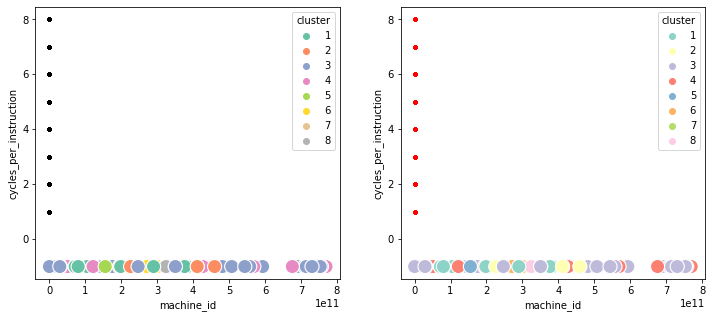

In [36]:
#'machine_id', 'cycles_per_instruction','cluster','event'

outliers = DBSCAN_dataset[DBSCAN_dataset['cycles_per_instruction']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('machine_id', 'cycles_per_instruction',

                data=DBSCAN_dataset[DBSCAN_dataset['event']!=-1],

                hue='cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot('machine_id', 'cycles_per_instruction',

                data=DBSCAN_dataset[DBSCAN_dataset['event']!=-1],

                hue='cluster', palette='Set3', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers['event'], outliers['cluster'], s=10, label='outliers', c="k")
axes[1].scatter(outliers['event'], outliers['cluster'], s=10, label='outliers', c="r")



plt.show()



Hierarchical clustering

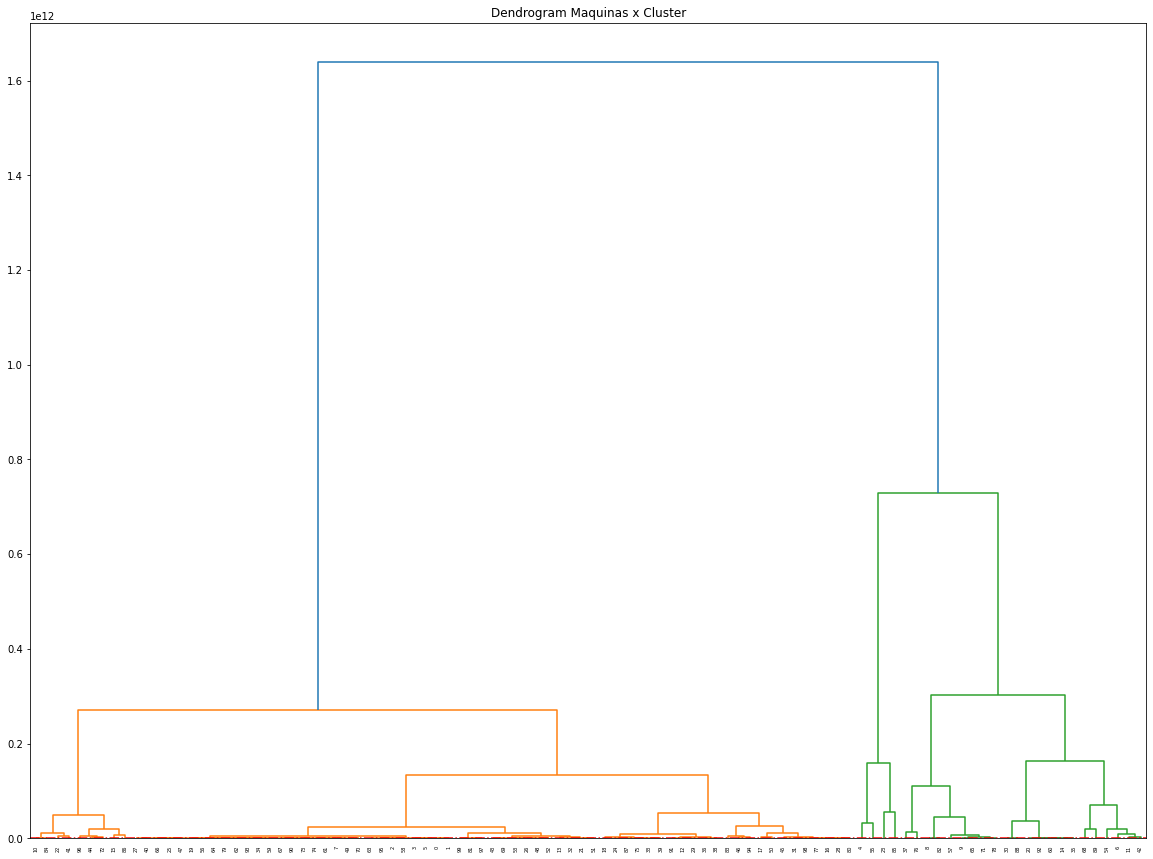

In [37]:
plt.figure(figsize=(20,15))
plt.title("Dendrogram Maquinas x Cluster")

# Selecting Annual Income and Spending Scores by index
selected_data = df.iloc[0:100,0:3:2]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters) 
plt.axhline(y=1.0, color = 'r', linestyle = '-.')
plt.show()

In [38]:
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_


array([1, 1, 1, 1, 2, 1, 0, 1, 3, 3, 4, 0, 1, 1, 0, 4, 1, 1, 1, 1, 0, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 4, 0, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 3, 1, 1, 0, 1, 1, 1, 1, 3,
       1, 1, 0, 1, 1, 3, 4, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 4, 2, 4, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 4, 1, 1, 1])

Text(0.5, 1.0, 'Labeled Customer Data')

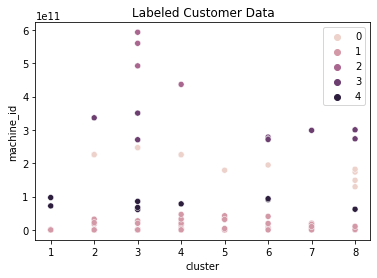

In [43]:
data_labels = clustering_model.labels_
sns.scatterplot(x='cluster', 
                y='machine_id', 
                data=selected_data, 
                hue=data_labels).set_title('Labeled Customer Data')